# Regularization Demo
## Ridge, Lasso y Elastic Net
### 1. Cargamos librerías

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

### 2. Vemos qué pinta tiene el dataset

In [2]:
# Loading pre-defined Boston Dataset 
boston_dataset = datasets.load_boston() 
print(boston_dataset.DESCR) 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

### 3. Rápido análisis exploratorio para ver sus dependencias lineales

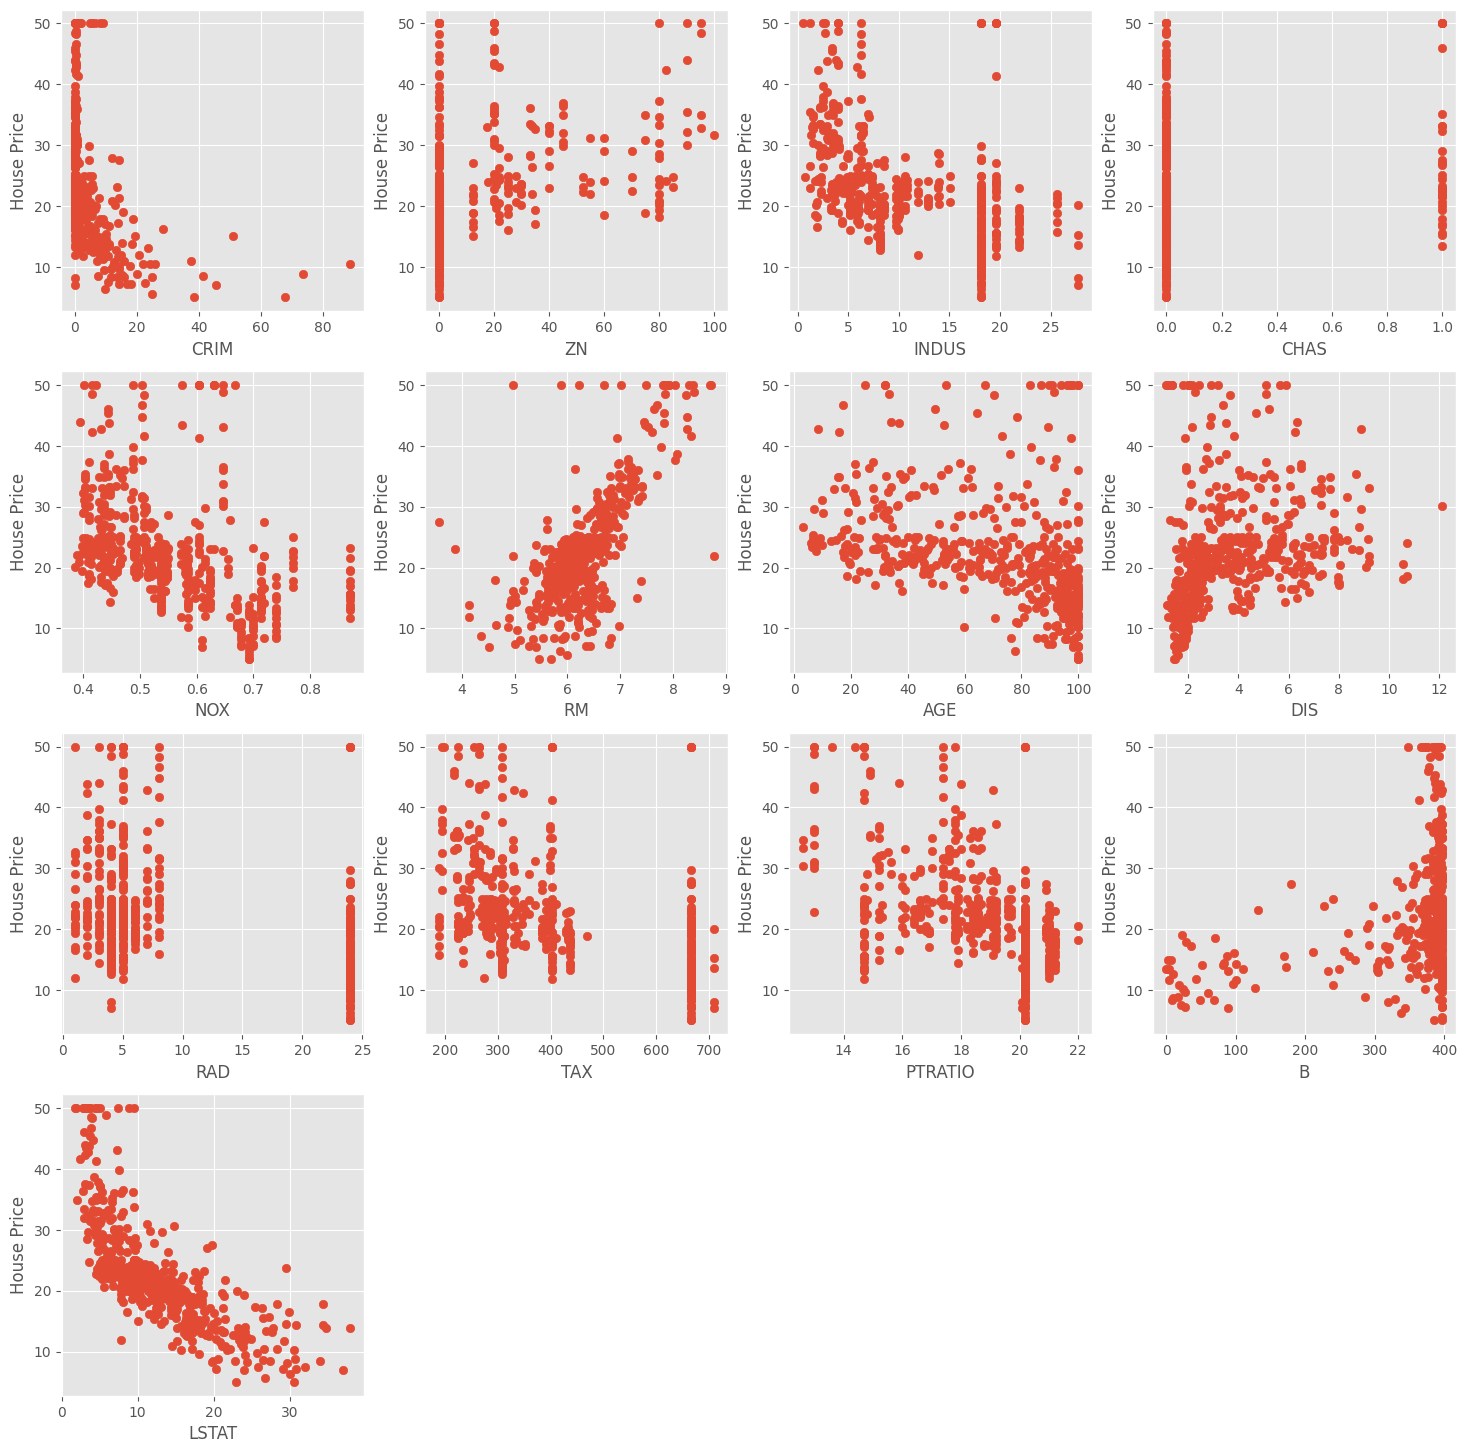

In [3]:
# Generate scatter plot of independent vs Dependent variable 
plt.style.use('ggplot') 
fig = plt.figure(figsize = (18, 18)) 
  
for index, feature_name in enumerate(boston_dataset.feature_names): 
    ax = fig.add_subplot(4, 4, index + 1) 
    ax.scatter(boston_dataset.data[:, index], boston_dataset.target) 
    ax.set_ylabel('House Price', size = 12) 
    ax.set_xlabel(feature_name, size = 12) 
  
plt.show() 

### 4. Preprocesado de los datos

In [5]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [8]:
# Load the dataset into Pandas Dataframe 
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
# Load the dataset into Pandas Dataframe 
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 
  
# input  
X = boston_pd.iloc[:, :-1] 
  
#output 
Y = boston_pd.iloc[:, -1] 
  
print(boston_pd.head())

x_train, x_test, y_train, y_test = train_test_split( 
    boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],  
    test_size = 0.25, random_state=314) 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

print("Train data shape of X = % s and Y = % s : "%( 
    x_train.shape, y_train.shape)) 
  
print("Test data shape of X = % s and Y = % s : "%( 
    x_test.shape, y_test.shape)) 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  
Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [19]:
x_train_sc.mean(), x_train_sc.std()

(2.1934960444309163e-15, 1.0000000000000004)

### 5. Regresión lineal múltiple

In [20]:
# Apply multiple Linear Regression Model 
### CODE
lreg = LinearRegression()
lreg.fit(x_train_sc, y_train)
lreg_y_pred = lreg.predict(x_test_sc)
  
# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 
  
# Putting together the coefficient and their corrsponding variable names  
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 

Mean squared Error on test set :  21.580967996916005
    Columns  Coefficient Estimate
0      CRIM             -1.178726
1        ZN              0.954960
2     INDUS              0.212099
3      CHAS              0.612197
4       NOX             -1.928599
5        RM              2.601666
6       AGE             -0.101679
7       DIS             -2.986448
8       RAD              2.904123
9       TAX             -2.475136
10  PTRATIO             -1.731918
11        B              0.859167
12    LSTAT             -3.629702


In [21]:
print("Coeficientes:", lreg.coef_)
print("Interceptor:", lreg.intercept_)

Coeficientes: [-1.17872606  0.95496017  0.21209945  0.61219652 -1.92859909  2.60166568
 -0.10167855 -2.98644794  2.9041231  -2.47513602 -1.73191802  0.85916671
 -3.62970152]
Interceptor: 22.498944591029048


Pintamos los coeficientes para verlos mejor

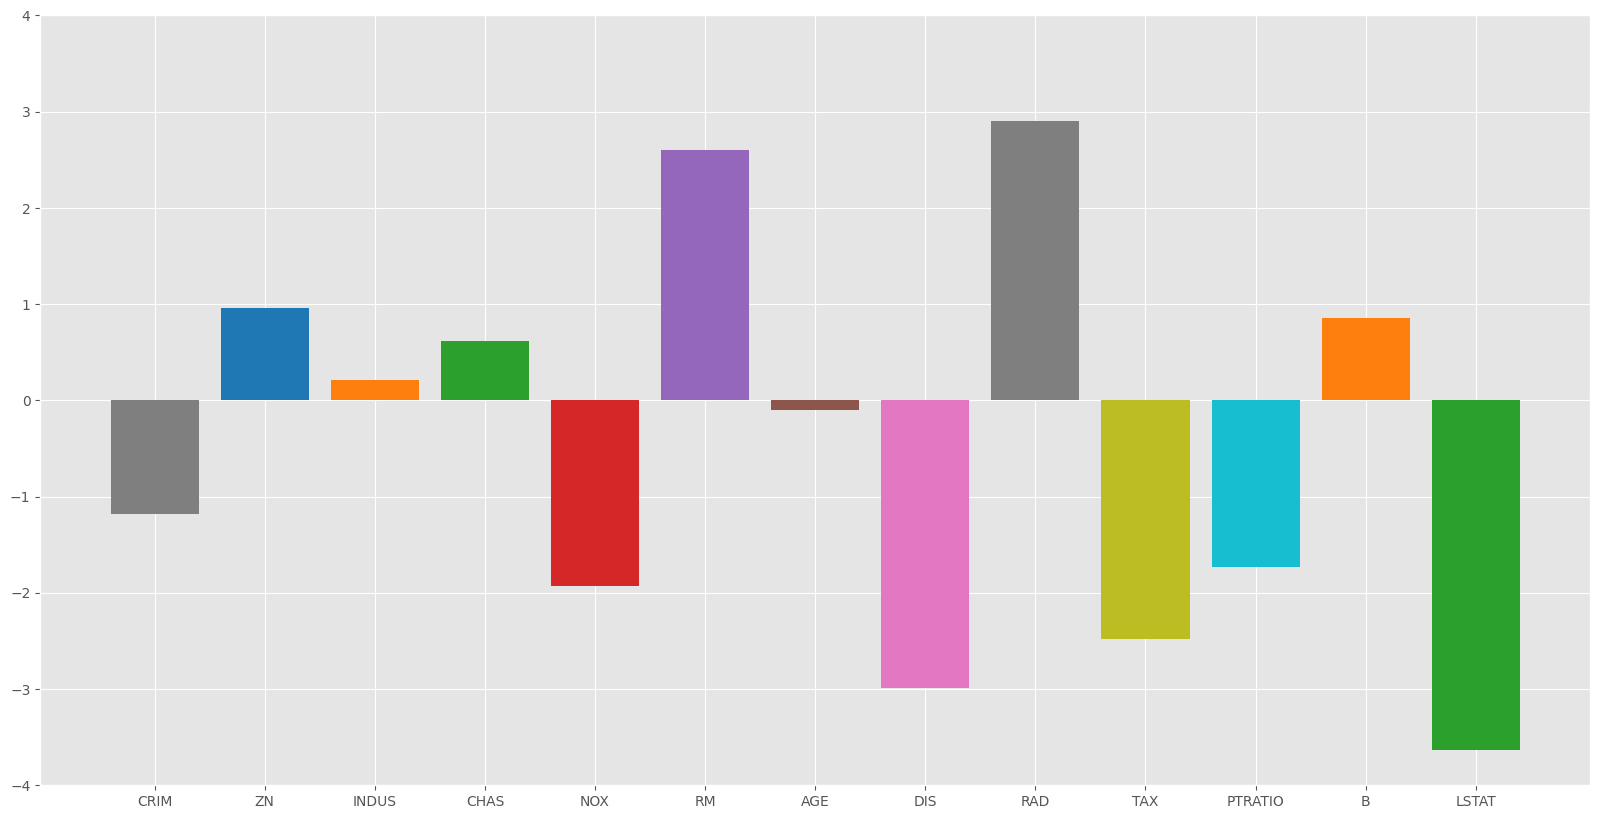

In [24]:
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lreg_coefficient["Columns"],  
lreg_coefficient['Coefficient Estimate'],  
color = color) 
  
# ax.spines['bottom'].set_position('zero') 
ax.set_ylim([-4,4])
  
plt.style.use('ggplot');

### 6. Ridge regression

In [57]:
# import ridge regression from sklearn library 
#### CODE
from sklearn.linear_model import Ridge
ls_alpha = []
ls_error = []
for alpha in np.linspace(0, 3, 50):
    ridgeR = Ridge(alpha=alpha)
    ridgeR.fit(x_train_sc, y_train)
    y_pred = ridgeR.predict(x_test_sc)

    # calculate mean square error 
    mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
    # print(mean_squared_error_ridge) 
    
    # get ridge coefficient and print them 
    ridge_coefficient = pd.DataFrame() 
    ridge_coefficient["Columns"]= x_train.columns 
    ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
    # print(ridge_coefficient) 
    # print(f"{alpha:.2f} --------> {mean_squared_error_ridge:.2f}")
    ls_alpha.append(alpha)
    ls_error.append(mean_squared_error_ridge)

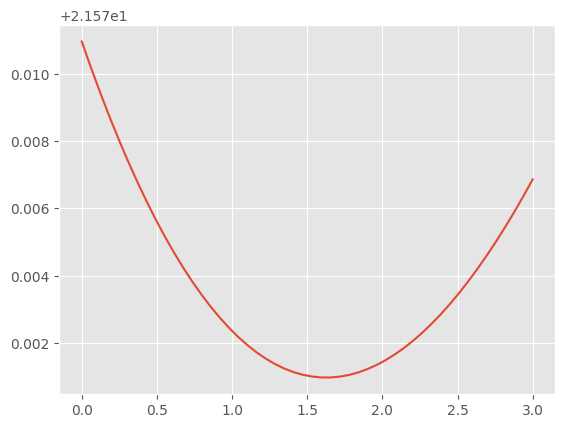

In [58]:
plt.plot(ls_alpha, ls_error)

In [43]:
print("Coeficientes:", ridgeR.coef_)
print("Interceptor:", ridgeR.intercept_)

Coeficientes: [-0.43544409  0.27255002 -0.49155377  0.36863018 -0.3797074   1.19462611
 -0.30746619 -0.07037123 -0.21809066 -0.42699628 -0.67884092  0.41410189
 -1.15385092]
Interceptor: 22.498944591029037


Veamos en la gráfica cómo quedaría para alpha = 1

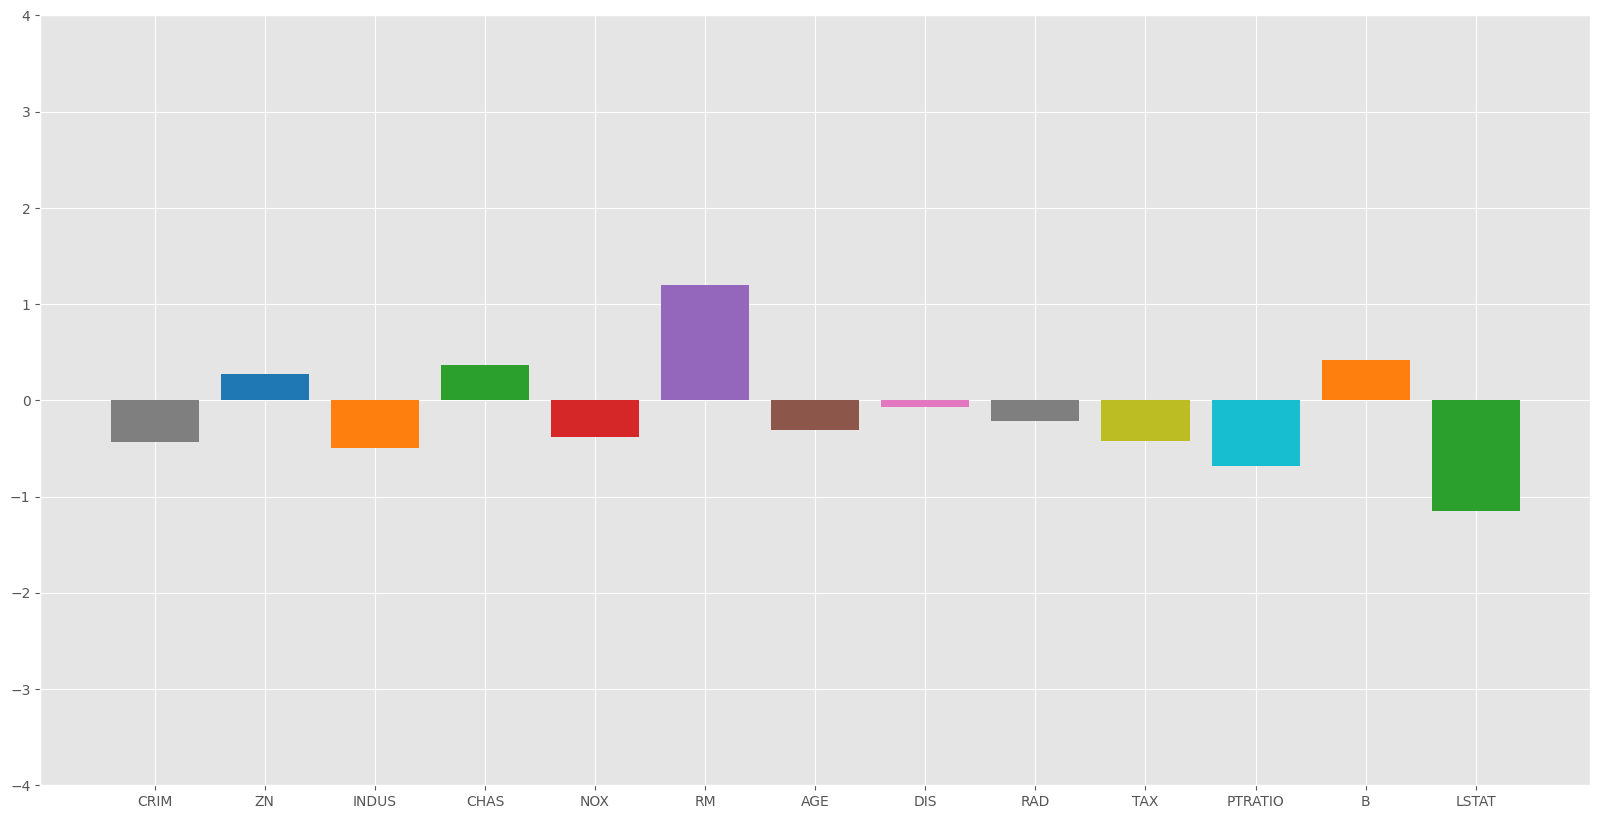

In [44]:
# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(ridge_coefficient["Columns"],  
ridge_coefficient['Coefficient Estimate'],  
color = color) 
  
# ax.spines['bottom'].set_position('zero') 
ax.set_ylim([-4,4])
  
plt.style.use('ggplot');

Si hacemos ahora alpha = 10

35.133882053386124
    Columns  Coefficient Estimate
0      CRIM             -0.062941
1        ZN              0.043864
2     INDUS             -0.028677
3      CHAS              1.356970
4       NOX             -1.917057
5        RM              4.825681
6       AGE             -0.024193
7       DIS             -1.015683
8       RAD              0.196162
9       TAX             -0.012140
10  PTRATIO             -0.819058
11        B              0.010327
12    LSTAT             -0.418859


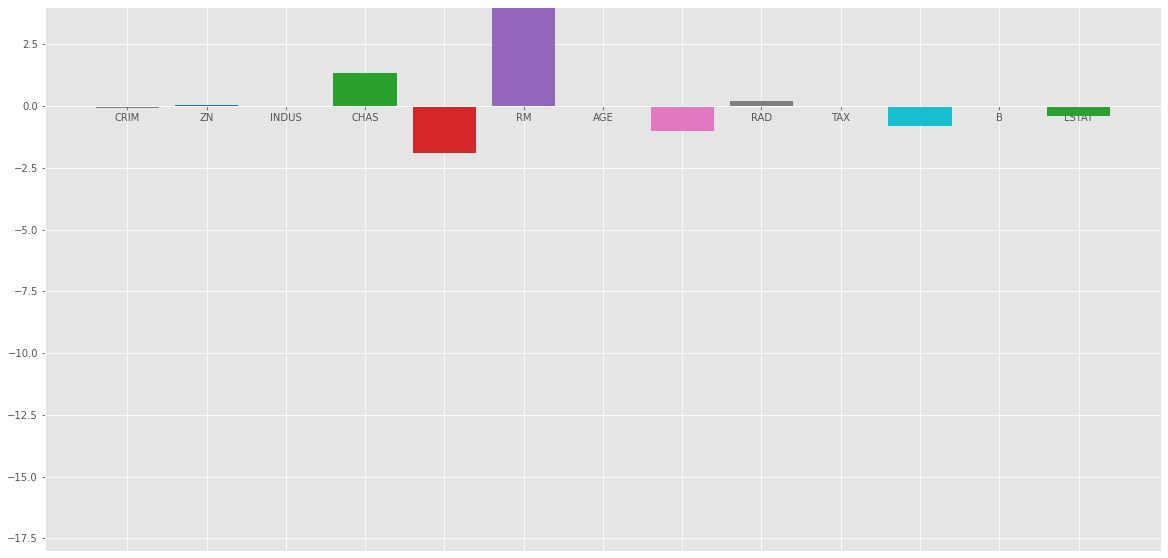

In [11]:
# Train the model  
ridgeR = Ridge(alpha = 10) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 
  
# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 
  
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(ridge_coefficient["Columns"],  
ridge_coefficient['Coefficient Estimate'], color = color) 
  
ax.spines['bottom'].set_position('zero') 
ax.set_ylim([-18,4])
  
plt.style.use('ggplot') 
plt.show() 

### 7. Lasso regression

Mean squared error on test set 22.10280675858269
    Columns  Coefficient Estimate
0      CRIM             -0.871529
1        ZN              0.501451
2     INDUS             -0.000000
3      CHAS              0.609560
4       NOX             -1.439511
5        RM              2.705761
6       AGE             -0.000000
7       DIS             -2.192880
8       RAD              1.301788
9       TAX             -1.073641
10  PTRATIO             -1.637901
11        B              0.718351
12    LSTAT             -3.690561


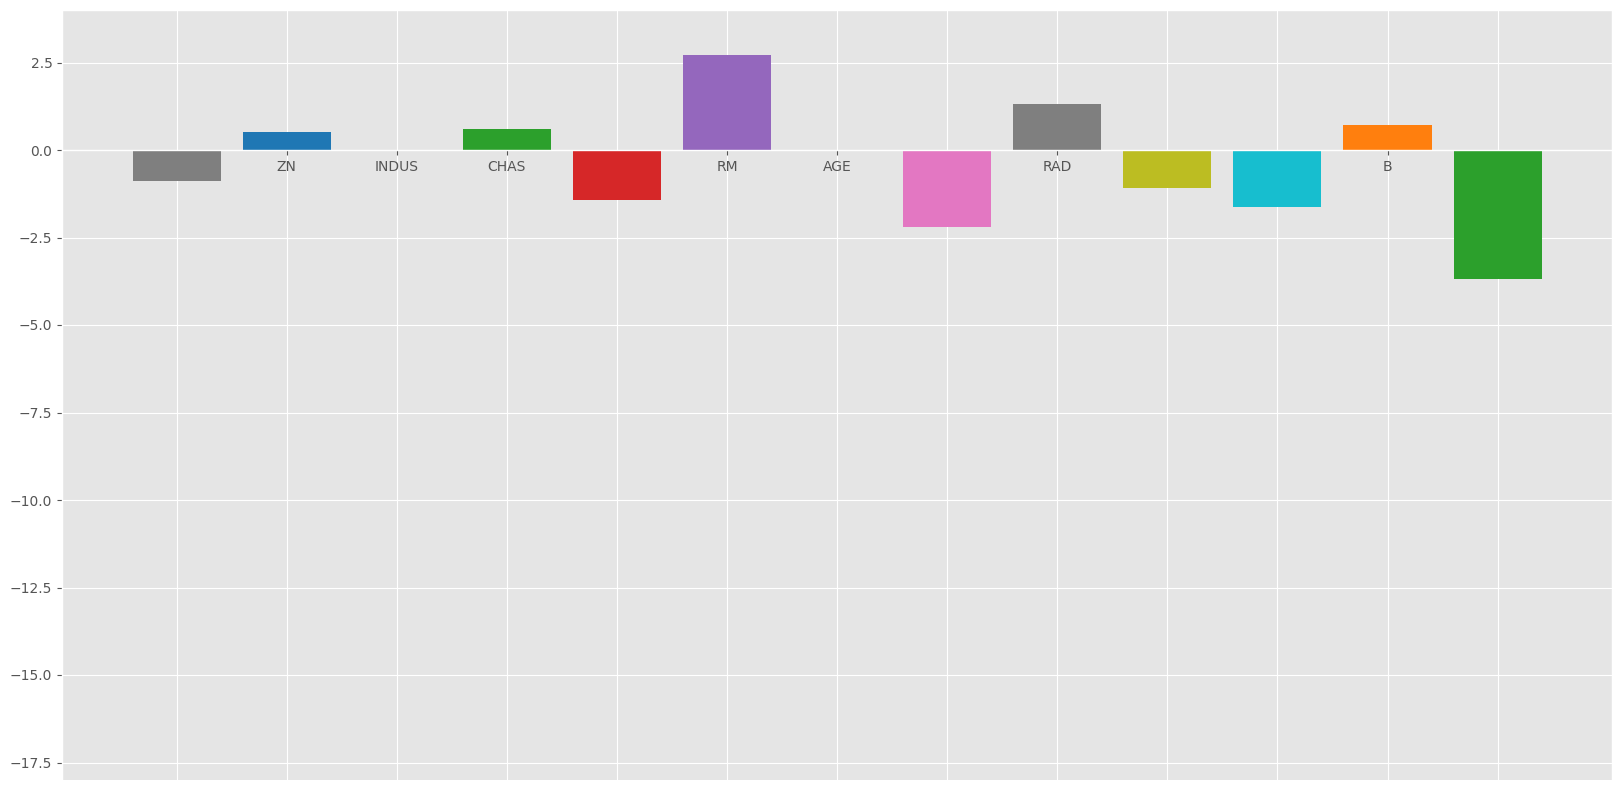

In [62]:
# import Lasso regression from sklearn library 
#### CODE
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.1)
lasso.fit(x_train_sc, y_train)
y_pred1 = lasso.predict(x_test_sc)

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lasso_coeff["Columns"],  
lasso_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
ax.set_ylim([-18,4])
  
plt.style.use('ggplot')

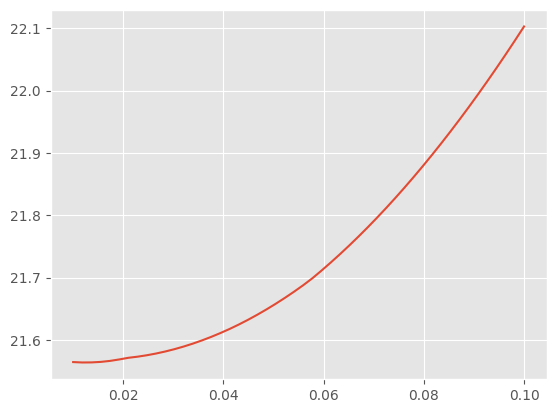

In [67]:
# import ridge regression from sklearn library 
#### CODE
from sklearn.linear_model import Ridge
ls_alpha = []
ls_error = []
for alpha in np.linspace(0.01, 0.1, 50):
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train_sc, y_train)
    y_pred1 = lasso.predict(x_test_sc)

    # Calculate Mean Squared Error 
    mean_squared_error = np.mean((y_pred1 - y_test)**2) 
    # print("Mean squared error on test set", mean_squared_error) 
    lasso_coeff = pd.DataFrame() 
    lasso_coeff["Columns"] = x_train.columns 
    lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

    # print(ridge_coefficient) 
    # print(f"{alpha:.2f} --------> {mean_squared_error_ridge:.2f}")
    ls_alpha.append(alpha)
    ls_error.append(mean_squared_error)

plt.plot(ls_alpha, ls_error)

Mean squared error on test set 53.15365443605091
    Columns  Coefficient Estimate
0      CRIM             -0.000000
1        ZN              0.025630
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.000000
6       AGE              0.000000
7       DIS             -0.000000
8       RAD              0.000000
9       TAX             -0.011330
10  PTRATIO             -0.000000
11        B              0.006632
12    LSTAT             -0.522161


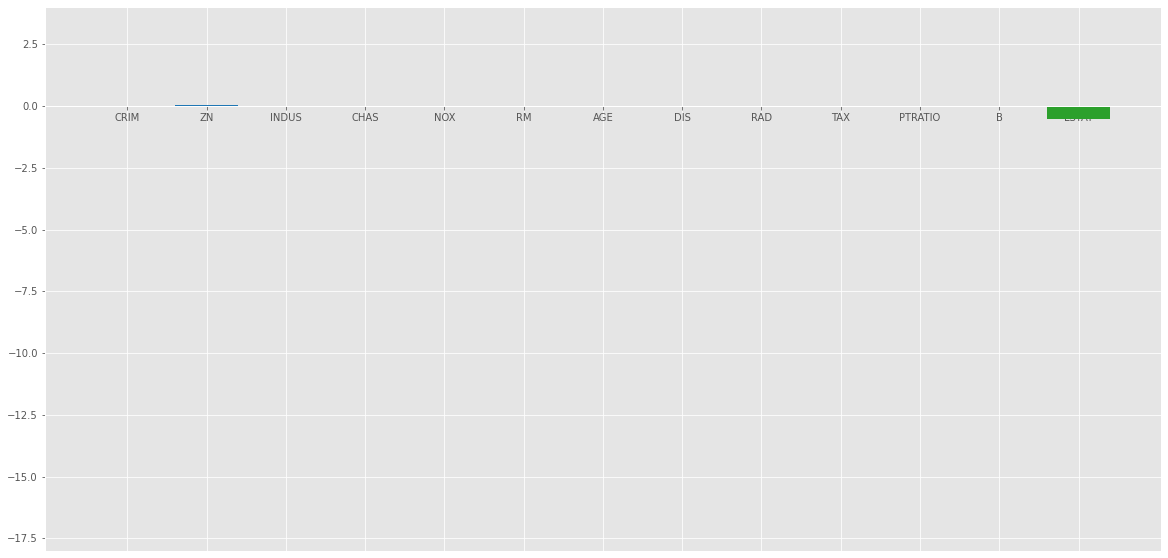

In [13]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 
  
# Train the model 
lasso = Lasso(alpha = 10) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 
  
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(lasso_coeff["Columns"],  
lasso_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero')
ax.set_ylim([-18,4])
  
plt.style.use('ggplot')

### 8. Elastic Net

c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


Mean Squared Error on test set 4685.779710320631


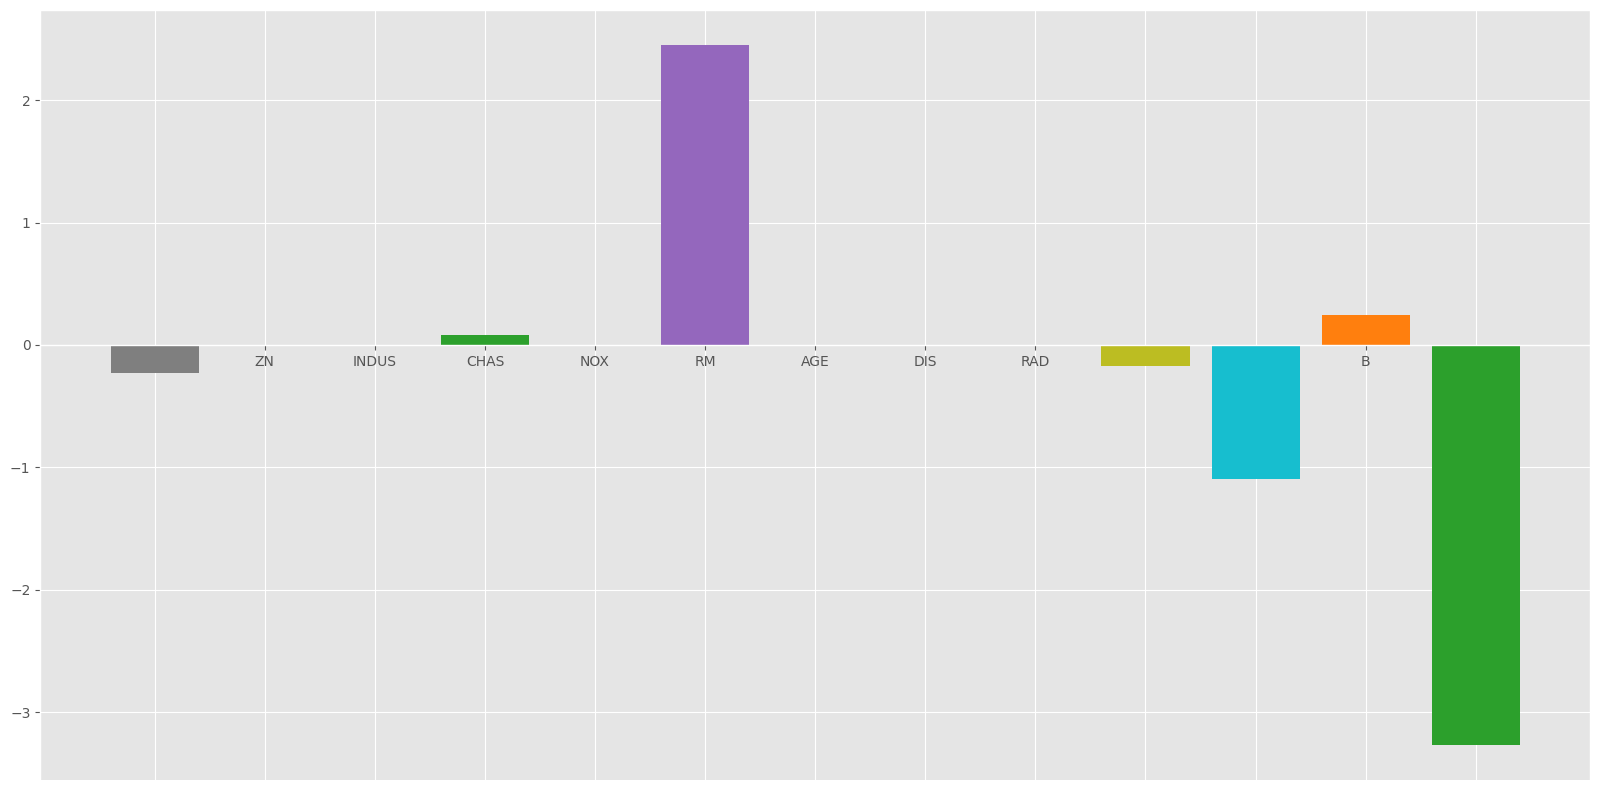

In [69]:
# import model 
#### CODE
from sklearn.linear_model import ElasticNet
e_net = ElasticNet(alpha=1, l1_ratio=.9)
e_net.fit(x_train_sc, y_train)

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 
  
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

# plotting the coefficient score 
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(e_net_coeff["Columns"],  
e_net_coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

Conclusion :
From the above analysis we can reach the following conclusion about different regularization methods:

Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values.
Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables.
Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc.
Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases.


In [72]:
X.shape, Y.shape

((506, 13), (506,))

In [ ]:
# Load the dataset into Pandas Dataframe 
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 
  
# input  
X = boston_pd.iloc[:, :-1] 
  
#output 
Y = boston_pd.iloc[:, -1] 
  
print(boston_pd.head())

x_train, x_test, y_train, y_test = train_test_split( 
    boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],  
    test_size = 0.25, random_state=314) 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

print("Train data shape of X = % s and Y = % s : "%( 
    x_train.shape, y_train.shape)) 
  
print("Test data shape of X = % s and Y = % s : "%( 
    x_test.shape, y_test.shape)) 

In [96]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

ls_mean_errors = []
ls_std_errors = []
alphas = np.logspace(-1, 2, 50)
for alpha in alphas:
    kf = KFold(n_splits=5, shuffle=True, random_state=421)
    ls_error = []
    for idx_train, idx_test in kf.split(x_train):
        x_train_cv = x_train.iloc[idx_train]#.copy()
        y_train_cv = y_train.iloc[idx_train]
        x_test_cv = x_train.iloc[idx_test]#.copy()
        y_test_cv = y_train.iloc[idx_test]

        sc = StandardScaler()
        x_train_cv_sc = sc.fit_transform(x_train_cv)
        x_test_cv_sc = sc.transform(x_test_cv)

        ridgeR = Ridge(alpha=alpha)
        ridgeR.fit(x_train_cv_sc, y_train_cv)

        y_pred_cv = ridgeR.predict(x_test_cv_sc)

        mae = mean_absolute_error(y_test_cv, y_pred_cv)
        ls_error.append(mae)
    
    ls_mean_errors.append(np.mean(ls_error))
    ls_std_errors.append(np.std(ls_error))

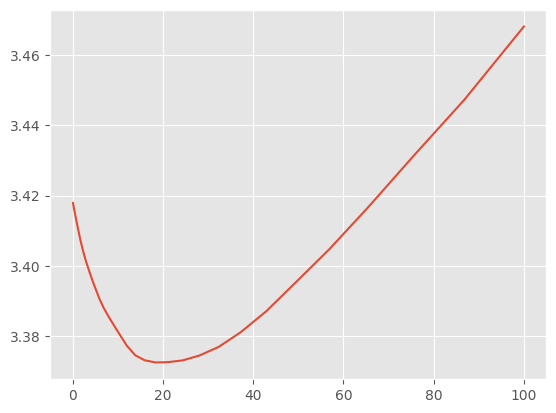

In [97]:
plt.plot(alphas, ls_mean_errors)

In [99]:
alphas[np.argmin(ls_mean_errors)]

18.420699693267164

In [89]:
Y.mean()

22.532806324110677

In [88]:
cv_score = np.mean(ls_error)
cv_std = np.std(ls_error)
cv_score, cv_std

(3.4118961562974848, 0.0632770488526131)